데이터셋 준비 
IMDB에서 제공하는 영화 리뷰 데이터셋 이용

## IMDB 데이터셋

--> 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개. 
<br>훈련 데이터 25000개, 테스트 데이터 25000개로 나뉘고 각각 50%는 부정, 50%는 긍정 리뷰로 구성됨.

## 1. 데이터셋 생성

훈련 데이터 25000개를 훈련 데이터 20000개, 검증 데이터 5000개로 분리 

분리 후 리뷰의 길이를 맞춰주기 위해 sequence를 사용하여 padding으로 0을 채워주거나 단어 길이의 최대값이 넘어가지 않도록 잘라내어 조정함.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, CuDNNLSTM
import numpy as np


max_features = 20000
text_max_words = 200

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)
np.load = np_load_old

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

Using TensorFlow backend.


## 2. 모델 구성
순환 신경망 모델 구성
<br>순환 신경망(RNN) : 시퀀스 모델, 입력과 출력을 시퀀스로 처리하는 모델이며,  시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태에 저장.
<br> LSTM : 그래디언트 소실문제를 해결하기 위해 고안된 순환층. (SimpleRNN의 한 변종)
정보를 여러 타임스텝이 걸쳐 나르는 방법이 추가됨.

In [2]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNLSTM(128))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

W0808 03:17:45.121878 140415591278464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 03:17:45.143754 140415591278464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 03:17:45.146258 140415591278464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,692,225
Trainable params: 2,692,225
Non-trainable params: 0
_________________________________________________________________
None


## 3. 모델 학습과정 설정


In [3]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0808 03:17:54.086073 140415591278464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 03:17:54.116646 140415591278464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0808 03:17:54.122872 140415591278464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 4. 모델 학습

In [4]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

W0808 03:18:09.227341 140415591278464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 8s 422us/step - loss: 0.4733 - acc: 0.7712 - val_loss: 0.4007 - val_acc: 0.8164
Epoch 2/25
20000/20000 [==============================] - 5s 265us/step - loss: 0.2561 - acc: 0.8989 - val_loss: 0.3289 - val_acc: 0.8742
Epoch 3/25
20000/20000 [==============================] - 5s 266us/step - loss: 0.1512 - acc: 0.9470 - val_loss: 0.4584 - val_acc: 0.8154
Epoch 4/25
20000/20000 [==============================] - 5s 266us/step - loss: 0.1158 - acc: 0.9602 - val_loss: 0.4273 - val_acc: 0.8700
Epoch 5/25
20000/20000 [==============================] - 5s 265us/step - loss: 0.0560 - acc: 0.9832 - val_loss: 0.4965 - val_acc: 0.8628
Epoch 6/25
20000/20000 [==============================] - 5s 264us/step - loss: 0.0407 - acc: 0.9869 - val_loss: 0.6478 - val_acc: 0.8510
Epoch 7/25
20000/20000 [==============================] - 5s 264us/step - loss: 0.0421 - acc: 0.9867 - val_loss: 0.6898 - v

## 5. 학습과정 보기

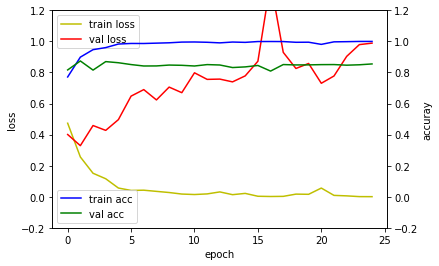

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


## 6. 모델 평가

In [6]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 3s 110us/step
## evaluation loss and_metrics ##
[1.0906725226211549, 0.844639999961853]
